In [2]:
import display
import hopfield_net
import read_csv
import noise
import numpy as np

np.random.seed(0)

In [3]:
patterns, dims = read_csv.read_patterns('./data/large-25x25.csv')
num_of_patterns = patterns.shape[0]

Adding some noise to the images:

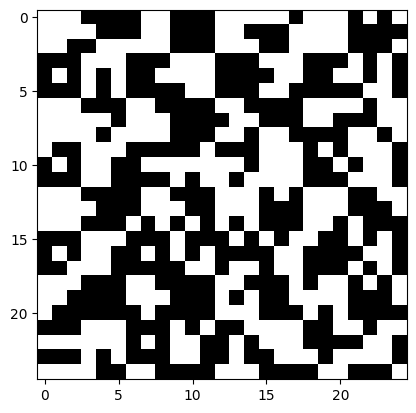

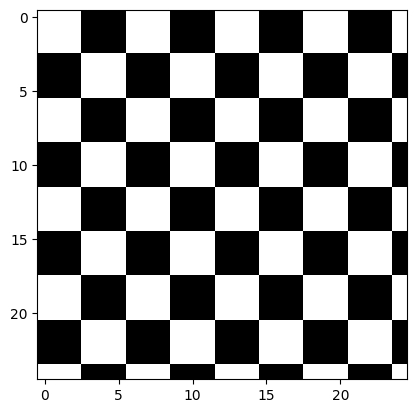

In [5]:
noised_patterns = np.array([noise.noise(pattern, 0.2) for pattern in patterns])
display.display(noised_patterns[2], dims)
display.display(patterns[2], dims)

Performing training of Hopfield net:

In [6]:
CONST_ACTIVATION_FUNCTIONS = ['signum', 'heavy_side']
CONST_DYNAMICS_TYPE = ['asynchronous', 'synchronous']



n = dims[0] * dims[1]
    # learning method 0 - Hebb, 1 - Oja
method = 0
    # activation function 0 - signum, 1 - heaviside
activation = 0
    # dynamics type 0 - asynchronous, 1 - synchronous
dynamics = 1

HN = hopfield_net.HopfieldNet(
    n = n,
    activation = CONST_ACTIVATION_FUNCTIONS[activation],
    dynamics = CONST_DYNAMICS_TYPE[dynamics]
)

HN.HEBB_training(patterns)

Some patterns were recognised correctly:

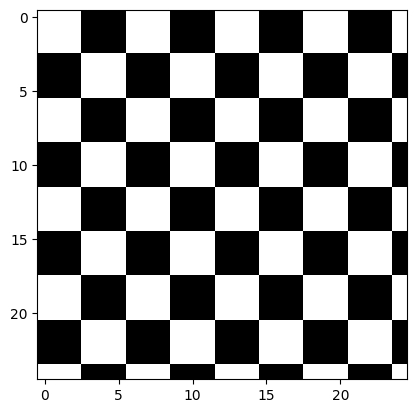

Convergence reached in epoch:  1
[array([ 1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,

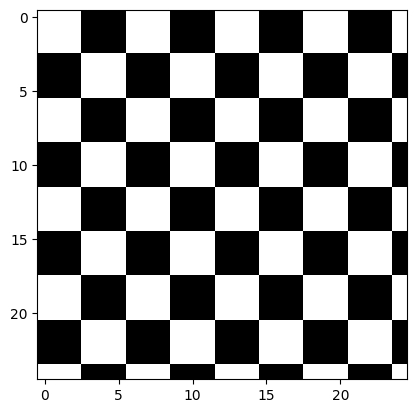

In [9]:
idx = 2
init_x = noised_patterns[idx]
display.display(patterns[idx], dims)
predict_x = HN.forward(dims, init_x = init_x, max_epochs = 5, animation = True)
display.display(predict_x, dims)

Whereas some resulted in strange local minimum:

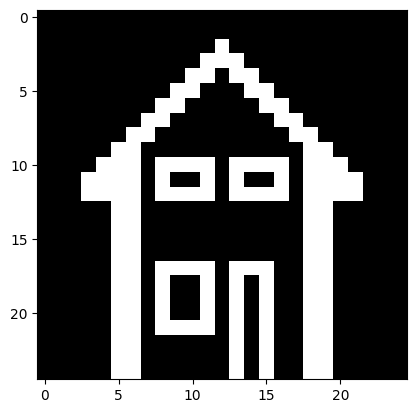

Max epochs reached!!!!
[array([-1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
 

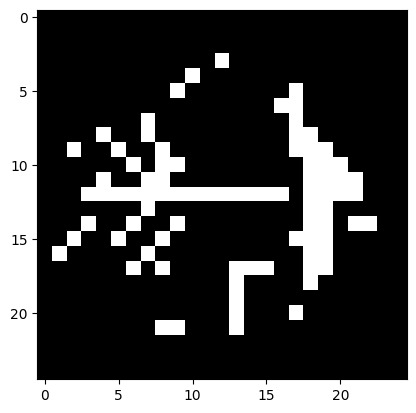

In [8]:
idx = 1
init_x = noised_patterns[idx]
display.display(patterns[idx], dims)
predict_x = HN.forward(dims, init_x = init_x, max_epochs = 5, animation = True)
display.display(predict_x, dims)